In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
#Normalize
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

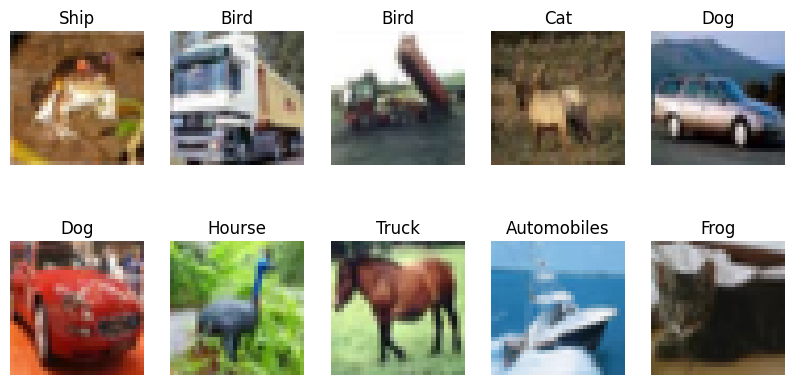

In [4]:
classes=['Airplane','Dog','Hourse','Frog','Cat','Deer','Ship','Truck','Automobiles','Bird']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()

In [5]:
# Create CNN Model
x=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                     layers.MaxPooling2D(2,2),
layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
                     layers.MaxPooling2D(2,2),
layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
                     
layers.Flatten(),
layers.Dense(32,activation='relu'),
layers.Dense(15,activation='softmax')])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile The Model

x.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
y=x.fit(x_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2575 - loss: 2.0075 - val_accuracy: 0.4596 - val_loss: 1.5120
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4864 - loss: 1.4164 - val_accuracy: 0.5503 - val_loss: 1.2733
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5548 - loss: 1.2327 - val_accuracy: 0.5870 - val_loss: 1.1685
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5989 - loss: 1.1272 - val_accuracy: 0.6076 - val_loss: 1.1156
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6220 - loss: 1.0615 - val_accuracy: 0.6209 - val_loss: 1.0731
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6482 - loss: 0.9887 - val_accuracy: 0.6373 - val_loss: 1.0425
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6631 - loss: 0.9487 - val_accuracy: 0.6555 - val_loss: 0.9840
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6797 - loss: 0

In [8]:
losses,accuracy=x.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6828 - loss: 0.9222 
0.6796000003814697
